# HW1 - Classification models in sklearn

You'll be building a few classifier models and using some of the tech tools we learned about in Modules 1 and 2. 

## The Raw Data

The data is the the KC housing data. **I've made all the necessary data files available to you
in the assignment folder.**

Kaggle source: https://www.kaggle.com/harlfoxem/housesalesprediction

Basic data dictionary

https://geodacenter.github.io/data-and-lab//KingCounty-HouseSales2015/

Link to discussion item meaning of CONDITION and GRADE fields:

https://www.kaggle.com/harlfoxem/housesalesprediction/discussion/141767





## Preliminary Data Prep
In order to use this data for a classification problem, I did some data prep work. Our target variable is a new variable that I created called `price_gt_1M` which is a binary variable:

* 1 - house price is greater than or equal to 1 million dollars
* 0 - house price is less than a million dollars

The data for this classification problem can be found in `./data/kc_house_data_classification.csv`.

If you want to see my data prep code, see the `hw1_sklearn_dataprep.ipynb` notebook.

## The Problem

Our overall goal is to build classifier models to predict `price_gt_1M` using the the other variables. You must use sklearn Pipelines that contain your preprocessing steps and your model estimation step. We did this in the class notes.

You should do your work in a Jupyter Notebook.

### Task 1 - Folder structure

Start by creating a new project folder structure with the `cookiecutter-datascience-simple` template that I covered in Module 1. Put the data files into an appropriate folder and put this notebook in the main project folder. Any additional notebooks and/or Python files you end up creating should go in the main project folder. 

Done


### Task 2 - Version control

Put your new project folder under version control using git. You should **NOT** track the data file. You must track all notebooks, Python scripts or additional text files you end up creating. Put appropriate information into your readme file.

Done. Intial phase done with files that were already present . Remainder of the files will be eventually added as the homework progresses.

### Task 3 - EDA

I suggest you start by reading the csv file into a pandas dataframe. I called my dataframe, `housing_df`.
Then start with some basic EDA. You can certainly use automated tools such as pandas-profiling, skimpy or SweetViz as I showed in the class notes. Remember, when you run some of those tools, you **must** have your notebook open in the classic Jupyter Notebook interface (and **NOT** in Jupyter Lab) Check their docs to see if Jupyter Lab is supported yet. I pip installed SweetViz and it seems to be working fine now with Jupyter Lab. As we've seen, the reports get created as HTML documents. These should go in your output folder within your project.

### Task 4 - Categorize feature types

As we did in the Pump it Up class notes, we are going to need to create a list of categorical variables and a list of numeric variables so that we
can apply the appropriate pre-processing to each. In the notes we used the data type of the columns to create lists of numeric and categorical variables. That's not necessarily going to work here as all the variables will come in as numeric. So, you'll have to come up with another way to create lists of the categorical variables and the numeric variables. 

Since we are using regularization, all of the numeric variables will need to rescaled using the `StandardScaler`. You'll do this later as part of the `Pipeline`. For any variables that you decide should be treated as categorical in your models, use the `OneHotEncoder` on them in the preprocessing stage.

Be careful, just because a variable has a numeric datatype in the pandas dataframe, it does **not** mean that it's necessarily a numeric variable in the context of the classification models. Think about each column and look at your EDA reports and decide whether or not it's truly numeric or needs to be treated as categorical data in the models.  

Even though our target variable, `price_gt_1M`, is categorical, you do **NOT** need to do any preprocessing on it. As I mentioned in our class notes, scikit-learn will automatically detect that and will do any encoding needed on its own.

Finally, you'll partition the dataset into training and test datasets for modeling: 

* I broke up the `housing_df` into two separate dataframes that I called `X` and `y`, to use in the models. Here's my code for that:

```
X = housing_df.iloc[:, 0:18]
y = housing_df.iloc[:, 18]
```

* Please use the following code for your data partitioning so that we all end up with the same training and test split:

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)
```

SINCE EDA AND FEATURE CATEGORIZATION GO TOGETHER , I HAVE INCLUDED THEM TOGETHER

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [3]:
%matplotlib inline

In [4]:
housing_df = pd.read_csv("./data/kc_house_data_classification.csv")

In [5]:
housing_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

In [7]:
pip install sweetviz


## EDA  and Feature Categorization

In [8]:
import sweetviz

In [9]:
report = sweetviz.analyze(housing_df)

In [10]:
report.show_html("output/sweetviz_report.html")

Report output/sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [11]:
cols_to_keep = housing_df.columns.to_list()

In [12]:
cols_to_keep

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price_gt_1M']

Since all the houses are located in the same county , the latitude and longitude do not affect the prices of the houses that much and hence can be dropped. Also the zipcode is also irrelevant.But sweetviz gives some relevance to longitude on its association with other variables

In [13]:
initial_drop = ['zipcode','lat']
cols_to_keep = [c for c in cols_to_keep if c not in initial_drop]
cols_to_keep

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price_gt_1M']

In [14]:
housing_df = housing_df.loc[:,cols_to_keep]

In [15]:
housing_df.select_dtypes(include=np.number).columns.to_list()

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price_gt_1M']

In [16]:
housing_df.select_dtypes(include=['object']).columns.tolist()

[]

So the housing df data does not have any categorical columns by the general test that pandas gives but it can have the categorical data classification done by sweet viz's analysis and hence we would need to convert them into categorical data

In [17]:
cols_categ = ['floors','waterfront','view','condition']

In [18]:
housing_df[cols_categ] = housing_df[cols_categ].astype('category')

In [19]:
housing_df.dtypes

bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors           category
waterfront       category
view             category
condition        category
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
long              float64
sqft_living15       int64
sqft_lot15          int64
price_gt_1M         int64
dtype: object

Even though sweet viz does not categorize a few of the columns as categories, but common sense classifies these variables as categories , For e.g. bedrooms, bathrooms, grade and hence can be factor lumped to form the categorical variables


In [20]:
cols_categ_new = ['bedrooms','bathrooms','grade','price_gt_1M']

In [21]:
housing_df[cols_categ_new] = housing_df[cols_categ_new].astype('category')

In [22]:
housing_df.loc[:,cols_categ_new].describe()

,bedrooms,bathrooms,grade,price_gt_1M
count,21613,21613.0,21613,21613
unique,13,30.0,12,2
top,3,2.5,7,0
freq,9824,5380.0,8981,20121


So now in order to applt factor lumping , we would need to see which all data make more sense and then lump accordingly 

In [23]:
housing_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

So here we need total 7 categories , since it decreases after that significantly

In [24]:
pip install siuba

Note: you may need to restart the kernel to use updated packages.


In [25]:
from siuba.dply.forcats import fct_lump

In [26]:
housing_df['bedrooms'] = fct_lump(housing_df['bedrooms'], n=5,other_level = 7)

In [27]:
housing_df['bedrooms'].value_counts()

3    9824
4    6882
2    2760
5    1601
7     274
6     272
Name: bedrooms, dtype: int64

In [28]:
housing_df['bathrooms'].value_counts()

2.5     5380
1.0     3852
1.75    3048
2.25    2047
2.0     1930
1.5     1446
2.75    1185
3.0      753
3.5      731
3.25     589
3.75     155
4.0      136
4.5      100
4.25      79
0.75      72
4.75      23
5.0       21
5.25      13
0.0       10
5.5       10
1.25       9
6.0        6
5.75       4
0.5        4
6.25       2
6.5        2
6.75       2
8.0        2
7.75       1
7.5        1
Name: bathrooms, dtype: int64

In [29]:
housing_df['bathrooms'] = fct_lump(housing_df['bathrooms'], n=10,other_level = 3.75)

In [30]:
housing_df['bathrooms'].value_counts()

2.5     5380
1.0     3852
1.75    3048
2.25    2047
2.0     1930
1.5     1446
2.75    1185
3.0      753
3.5      731
3.75     652
3.25     589
Name: bathrooms, dtype: int64

In [31]:
housing_df['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [32]:
housing_df['grade'] = fct_lump(housing_df['grade'], n=7,other_level = 12)

In [33]:
housing_df['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12     136
Name: grade, dtype: int64

Now making a year over year analysis

In [191]:
status_by_year = pd.crosstab(housing_df['yr_built'], housing_df['price_gt_1M'], normalize='index')
status_by_year.head()

price_gt_1M,0,1
yr_built,,
1900,0.919540,0.080460
1901,0.965517,0.034483
1902,0.888889,0.111111
1903,0.978261,0.021739
1904,0.955556,0.044444


In [192]:
status_by_year_1 = pd.crosstab(housing_df['yr_renovated'], housing_df['price_gt_1M'], normalize='index')
status_by_year_1.head()

price_gt_1M,0,1
yr_renovated,,
0,0.936712,0.063288
1934,1.000000,0.000000
1940,1.000000,0.000000
1944,1.000000,0.000000
1945,1.000000,0.000000


So here we can see that the houses that were either built currently or were either renovated recently have a higher share of price greater than 1 M when compared over Year over Year basis

Finally using sweet_viz we need to eliminate all the columns which do not have any association with any type of variables ,they are waterfront, sqft_lot and sqft_lot 15 since they are associated with each other but not with any other variables. Even though yr_renovated has very less association with any other variable but it has a direct impact on the price and hence cannot be avoided.

In [36]:
final_drop = ['sqft_lot','sqft_lot15','waterfront']
cols_to_keep = [c for c in cols_to_keep if c not in final_drop]

In [37]:
cols_to_keep

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'long',
 'sqft_living15',
 'price_gt_1M']

In [38]:
housing_df = housing_df.loc[:,cols_to_keep]

Final Dataframe

In [39]:
housing_df.head()

,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,long,sqft_living15,price_gt_1M
0,3,1.00,1180,1.0,0,3,7,1180,0,1955,0,-122.257,1340,0
1,3,2.25,2570,2.0,0,3,7,2170,400,1951,1991,-122.319,1690,0
2,2,1.00,770,1.0,0,3,6,770,0,1933,0,-122.233,2720,0
3,4,3.00,1960,1.0,0,5,7,1050,910,1965,0,-122.393,1360,0
4,3,2.00,1680,1.0,0,3,8,1680,0,1987,0,-122.045,1800,0


In [40]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       21613 non-null  category
 1   bathrooms      21613 non-null  category
 2   sqft_living    21613 non-null  int64   
 3   floors         21613 non-null  category
 4   view           21613 non-null  category
 5   condition      21613 non-null  category
 6   grade          21613 non-null  category
 7   sqft_above     21613 non-null  int64   
 8   sqft_basement  21613 non-null  int64   
 9   yr_built       21613 non-null  int64   
 10  yr_renovated   21613 non-null  int64   
 11  long           21613 non-null  float64 
 12  sqft_living15  21613 non-null  int64   
 13  price_gt_1M    21613 non-null  category
dtypes: category(7), float64(1), int64(6)
memory usage: 1.3 MB


In [41]:
X = housing_df.iloc[:, 0:13]
y = housing_df.iloc[:, 13]

### Task 4 - Logistic regression models

You are going to build a few different logistic regression models using all of the variables in our housing dataset. For each of these models you will:

- Create a pipeline to do the preprocessing (the scaling and encoding) and the modeling (we did this in the Pump it Up project)
- I'll be giving you different specifications and hyperparameter parameter settings to try
- You'll be scoring the models on overall accuracy for both the training and test data. Discuss any evidence of overfitting or underfitting as well as how the model does in comparison to the null model.
- There will be some additional tasks/questions for each model - details below

**IMPORTANT** You always should put summary comments in one or more markdown cells. Do **NOT** write them as comments in a code cell. The whole point of Jupyter notebooks is to be able to mix markdown cells with code cells. Yes, you should also include code comments but those are different than analysis comments.

#### Model 0: The null model

We always start with the simplest possible model and we call it the *null model*. For binary classification models, the null model is usually just to predict that each observation will fall into whichever class is most prevalent. In other words, what would be the performance of a model in which we just predict 0 for everyone? There's no need to fit a model, just compute the accuracy for train and test if everyone was classified as 0.

#### Model 1: Ridge regression with C=1.0

Build a ridge regression model to predict `price_gt_1M` and use the default value of `C=1.0`. I used the following additional options with the `LogisticRegression` model - `solver='saga', max_iter=2000`. Feel free to change these if you want. AFter fitting the model, compute its accuracy score for training and test and write out a little summary (f-strings are useful). Here's an example:

    Training score: 0.974
    Test score: 0.971

Create confusion matrices for both training and test.

Also, create a plot of the coefficients (as we did in the notes). If you want to use that `coef_plot` function we used in the notes, you'll have
to make a few modifications because we only have one set of coefficients (since we have a binary classification problem as opposed to a 3-class problem in Pump it Up).

#### Model 2: Lasso regression with C=1.0

Same as Model 1, but use lasso regression instead of ridge regression. Create the same outputs and compare the performance to the ridge regression model.

#### Model 3: Lasso regression with C=0.01

Fit another lasso regression but use `C=0.01`. Does this enforce more or less regularization? Create the same outputs and compare the performance to the first two models. Discuss why the plot looks so different than the previous plots.

#### Model 4: Lasso regression with optimal C value

Now use `LogisticRegressionCV` to fit a model and let sklearn determine the optimal `C` value to use. Again, compute score and confusion matrices. Also, print out the optimal value of `C`. Does regularization help for this problem?

### Task 5 - Random forest model
Now fit a random forest model to predict `price_gt_1M`. As we did above, for both train and test, compute the accuracy score, create a confusion matrix, and discuss the performance relative to your logistic regression models. Obviously you do not need to create a coefficient plot (why not?).
 




In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split

Taking both numerical and categorical data to be allowed to run the transformer on them so that a pipeline is created

In [43]:
categorical_cols = X.select_dtypes(include=['category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

In [44]:
all_cols = X.columns.tolist()

In [45]:
numeric_cols

['sqft_living',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'long',
 'sqft_living15']

In [46]:
categorical_cols

['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade']

In [47]:
assert len(all_cols) == len(categorical_cols) + len(numeric_cols)

In [48]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

First half of pipeline

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

#### Model 0: The null model


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

So if everything is classified as 0 , then for the null model , there is no concept of glm in scikit . So by basic logic , if everything is classified as 0. Then the score would be number of 0's / total number of values i.e. the number of correctly classified 0's by total data

In [51]:
y_train.value_counts()[0]/len(y_train)

0.9327356853672644

In [52]:
y_test.value_counts()[0]/len(y_test)


0.9238954429794124

#### Model 1: Ridge regression with C=1.0

In [53]:
clf_1_model = LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=2000)

In [54]:
clf_1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_1_model)])

In [55]:
# Fit model on training data 
clf_1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['sqft_living', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'long',
                                                   'sqft_living15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'view',
                                                   'condition', 'grade'])])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=2000, solver='saga'))])

In [56]:
print(f"Training score: {clf_1.score(X_train, y_train):.3f}")
print(f"Test score: {clf_1.score(X_test, y_test):.3f}")

Training score: 0.960
Test score: 0.958


In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [130]:

def confuse_mat(titles_options,class_names,X_,y_,model):
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, X_, y_,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()

Confusion Matrix - Train Data

In [58]:
y_pred = clf_1.predict(X_train)

In [121]:
confusion_matrix(y_train,y_pred)

array([[15929,   198],
       [  496,   667]], dtype=int64)

C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for train, without normalization
[[15929   198]
 [  496   667]]
Normalized confusion matrix for train
[[0.98772245 0.01227755]
 [0.42648323 0.57351677]]


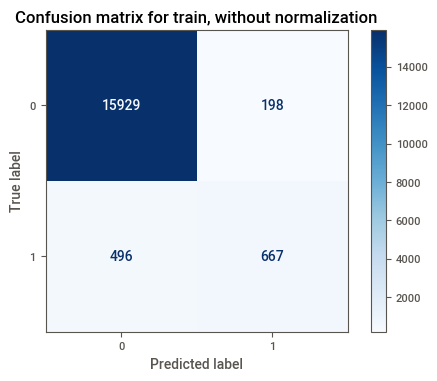

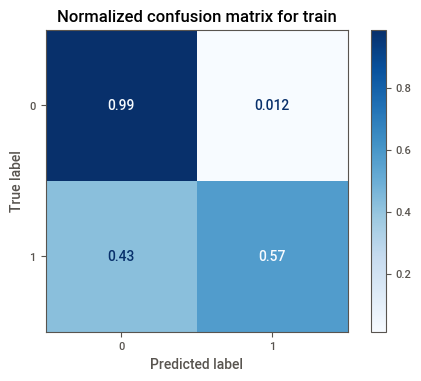

In [131]:
title_1 = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

confuse_mat(title_1,clf_1['classifier'].classes_,X_train,y_train,clf_1)

Confusion Matrix - Test Data

In [60]:
y_test_pred = clf_1.predict(X_test)

In [123]:
confusion_matrix(y_test,y_test_pred)

array([[3942,   52],
       [ 131,  198]], dtype=int64)

C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for test, without normalization
[[3942   52]
 [ 131  198]]
Normalized confusion matrix for test
[[0.98698047 0.01301953]
 [0.39817629 0.60182371]]


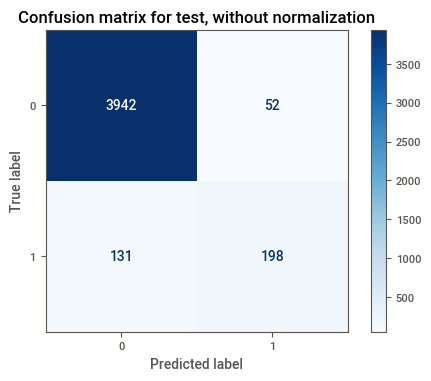

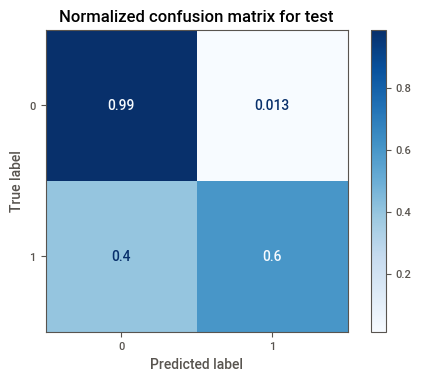

In [132]:
title_test_1 = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

confuse_mat(title_test_1,clf_1['classifier'].classes_,X_test,y_test,clf_1)

In [62]:
clf_1.named_steps['classifier'].coef_.shape

(1, 48)

In [63]:
def coef_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
       
    if title:
        ax[1].set_title(title)

    for i in range(1):
        ax[i].plot(model.steps[1][1].coef_[i])

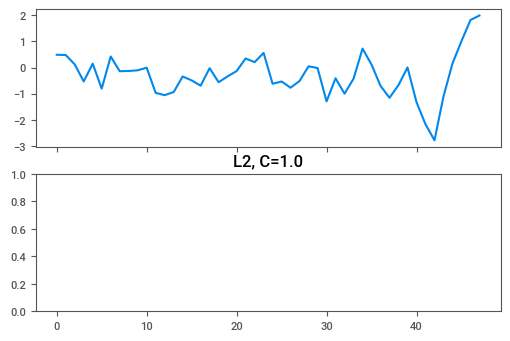

In [64]:
coef_plot(clf_1, 'L2, C=1.0')

#### Model 2: Lasso regression with C=1.0

In [65]:
clf_2_model = LogisticRegression(penalty='l1', C=1, solver='saga', max_iter=2000)

In [66]:
clf_2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_2_model)])

In [67]:
# Fit model on training data 
clf_2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['sqft_living', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'long',
                                                   'sqft_living15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'view',
                                                   'condition', 'grade'])])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=2000, penalty='l1',
                                    solver='saga'))])

In [68]:
print(f"Training score: {clf_2.score(X_train, y_train):.3f}")
print(f"Test score: {clf_2.score(X_test, y_test):.3f}")

Training score: 0.960
Test score: 0.957


Confusion Matrix - Train Data

In [69]:
y_pred_2 = clf_2.predict(X_train)

In [128]:
confusion_matrix(y_train,y_pred_2)

array([[15927,   200],
       [  499,   664]], dtype=int64)

C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for train, without normalization
[[15927   200]
 [  499   664]]
Normalized confusion matrix for train
[[0.98759844 0.01240156]
 [0.42906277 0.57093723]]


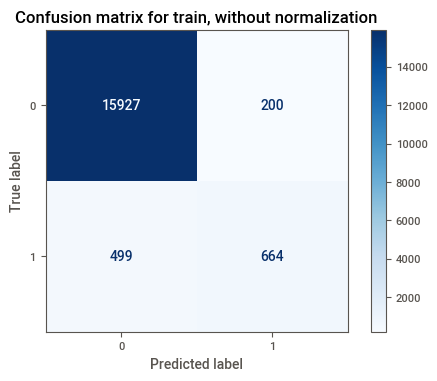

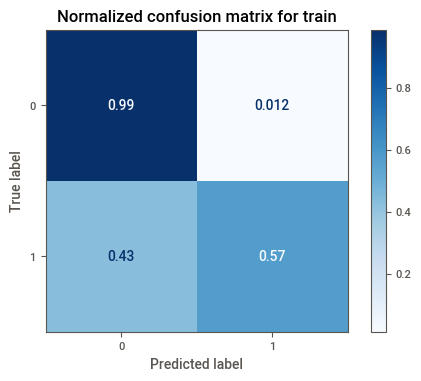

In [133]:
title_2 = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

confuse_mat(title_2,clf_2['classifier'].classes_,X_train,y_train,clf_2)

Confusion Matrix - Test Data

In [71]:
y_test_pred_2 = clf_2.predict(X_test)

In [134]:
confusion_matrix(y_test,y_test_pred_2)

array([[3940,   54],
       [ 131,  198]], dtype=int64)

C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for test, without normalization
[[3940   54]
 [ 131  198]]
Normalized confusion matrix for test
[[0.98647972 0.01352028]
 [0.39817629 0.60182371]]


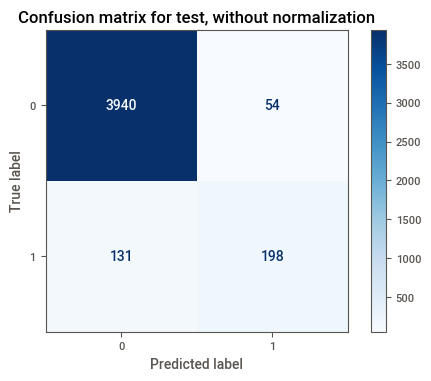

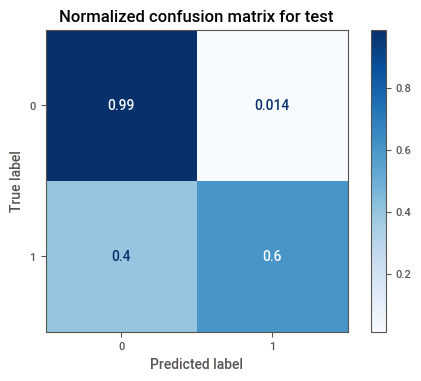

In [135]:
title_test_2 = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

confuse_mat(title_test_2,clf_2['classifier'].classes_,X_test,y_test,clf_2)

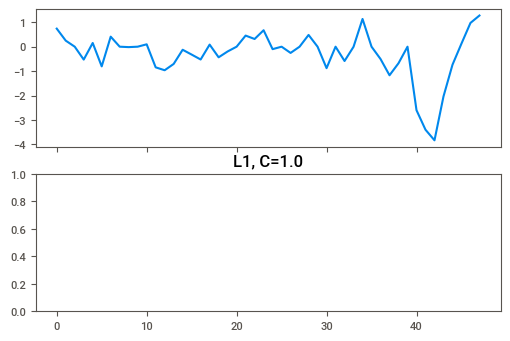

In [73]:
coef_plot(clf_2, 'L1, C=1.0')

#### Model 3: Lasso regression with C=0.01

In [74]:
clf_3_model = LogisticRegression(penalty='l1', C=0.01, solver='saga', max_iter=2000)


In [75]:
clf_3 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_3_model)])

In [76]:
# Fit model on training data 
clf_3.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['sqft_living', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'long',
                                                   'sqft_living15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'view',
                                                   'condition', 'grade'])])),
                ('classifier',
                 LogisticRegression(C=0.01, max_iter=2000, penalty='l1',
                                    solver='saga'))])

In [77]:
print(f"Training score: {clf_3.score(X_train, y_train):.3f}")
print(f"Test score: {clf_3.score(X_test, y_test):.3f}")


Training score: 0.953
Test score: 0.948


Confusion Matrix - Train Data

In [78]:
y_pred_3 = clf_3.predict(X_train)

In [136]:
confusion_matrix(y_train,y_pred_3)

array([[15998,   129],
       [  684,   479]], dtype=int64)

C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for train, without normalization
[[15998   129]
 [  684   479]]
Normalized confusion matrix for train
[[0.99200099 0.00799901]
 [0.58813414 0.41186586]]


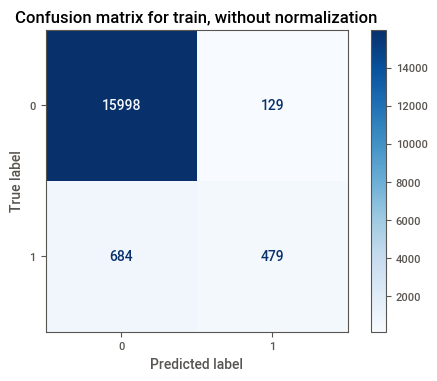

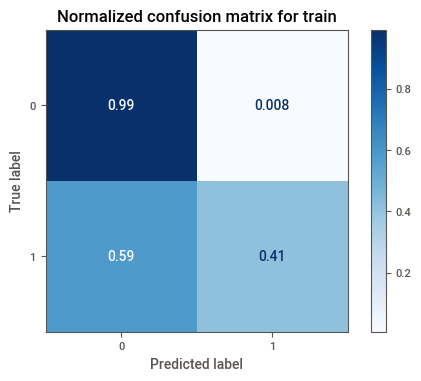

In [137]:
title_3 = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

confuse_mat(title_3,clf_3['classifier'].classes_,X_train,y_train,clf_3)

Confusion Matrix - Test Data

In [80]:
y_test_pred_3 = clf_3.predict(X_test)

In [138]:
confusion_matrix(y_test,y_test_pred_3)

array([[3956,   38],
       [ 187,  142]], dtype=int64)

C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for test, without normalization
[[3956   38]
 [ 187  142]]
Normalized confusion matrix for test
[[0.99048573 0.00951427]
 [0.56838906 0.43161094]]


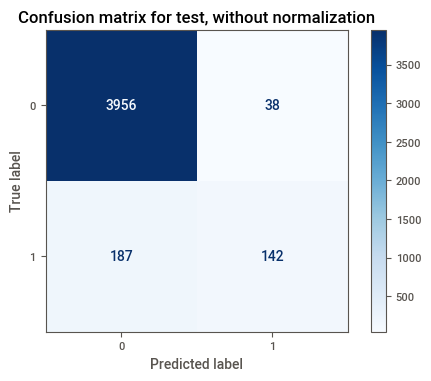

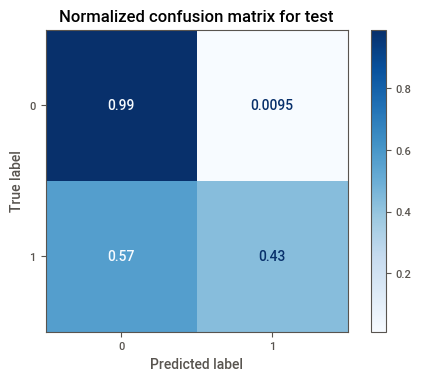

In [139]:
title_3 = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

confuse_mat(title_3,clf_3['classifier'].classes_,X_test,y_test,clf_3)

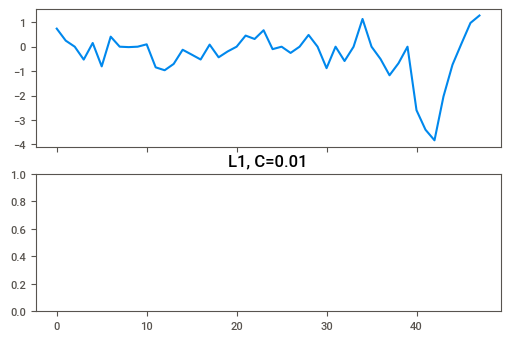

In [82]:
coef_plot(clf_2, 'L1, C=0.01')

#### Model 4: Lasso regression with optimal C value

In [83]:
n_folds = 10
C_values = [0.001, 0.01, 0.05, 0.1, 1.,5,10,100.]


In [84]:
clf_4_model =LogisticRegressionCV(Cs=C_values, cv=n_folds, penalty='l1',                         
                           solver='liblinear',max_iter=2000)

In [85]:
clf_4 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_4_model)])

In [86]:
# Fit model on training data 
clf_4.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['sqft_living', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'long',
                                                   'sqft_living15']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['bedrooms', 'bathrooms',
                                                   'floors', 'view',
                                                   'condition', 'grade'])])),
                ('classifier',
                 LogisticRegressionCV(Cs=[0.001, 0.01, 0.05, 0.1, 1.0, 5, 10,
                                          100.0],
                                      cv=10, max_iter=2000, penalty='l1',
                                      solver='liblinear'))])

In [87]:
print(f"Training score: {clf_4.score(X_train, y_train):.3f}")

print(f"Test score: {clf_4.score(X_test, y_test):.3f}")




Training score: 0.960
Test score: 0.958


In [88]:
print(clf_4.steps[1][1].C_)

[5.]


The value of C selected is 5

No regularization does not help for this model , the score is only reducing

Confusion Matrix - Train Data

In [89]:
y_pred_4 = clf_4.predict(X_train)

In [140]:
confusion_matrix(y_train,y_pred_4)

array([[15924,   203],
       [  497,   666]], dtype=int64)

C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for train, without normalization
[[15924   203]
 [  497   666]]
Normalized confusion matrix for train
[[0.98741241 0.01258759]
 [0.42734308 0.57265692]]


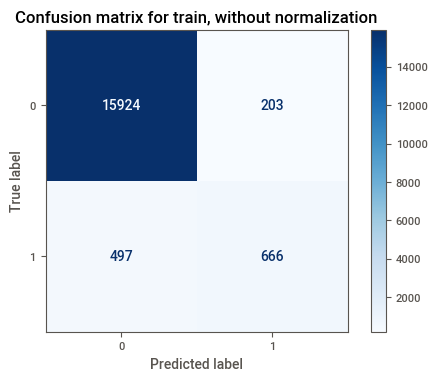

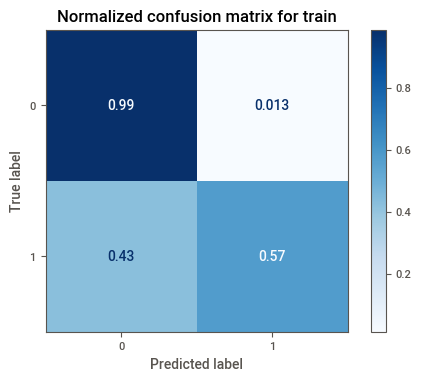

In [141]:
title_4 = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

confuse_mat(title_4,clf_4['classifier'].classes_,X_train,y_train,clf_4)

Confusion Matrix - Test Data

In [91]:
y_pred_test_4 = clf_4.predict(X_test)

In [142]:
confusion_matrix(y_test,y_pred_test_4)

array([[3941,   53],
       [ 130,  199]], dtype=int64)

C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for test, without normalization
[[3941   53]
 [ 130  199]]
Normalized confusion matrix for test
[[0.9867301  0.0132699 ]
 [0.39513678 0.60486322]]


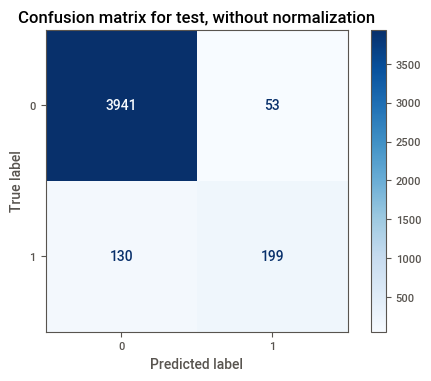

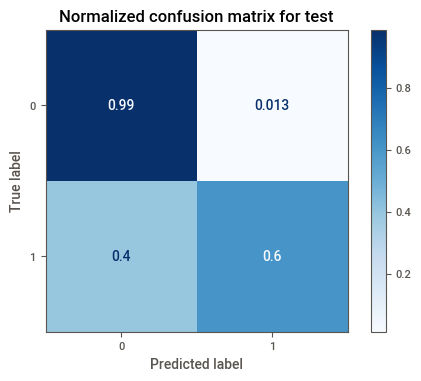

In [143]:
title_test_4 = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

confuse_mat(title_test_4,clf_4['classifier'].classes_,X_test,y_test,clf_4)

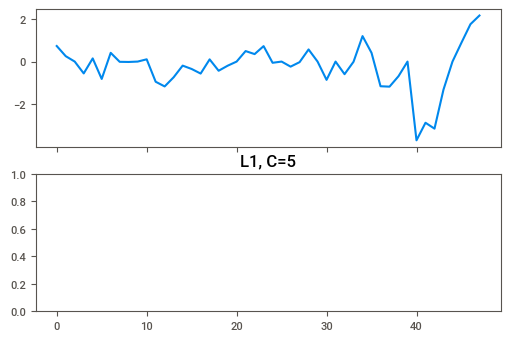

In [93]:
coef_plot(clf_4, 'L1, C=5')

#### Random Forest Classifier

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
# Append random forest classifier to preprocessing pipeline.
clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(oob_score=True, random_state=0))])


clf_rf.fit(X_train, y_train)

print(f"Training score: {clf_rf.score(X_train, y_train):.3f}")
print(f"Test score: {clf_rf.score(X_test, y_test):.3f}")

Training score: 1.000
Test score: 0.960


Confusion Matrix - Train Data

In [96]:
y_pred_rf = clf_rf.predict(X_train)

In [144]:
confusion_matrix(y_train,y_pred_rf)

array([[16127,     0],
       [    1,  1162]], dtype=int64)

C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for train, without normalization
[[16127     0]
 [    1  1162]]


C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Normalized confusion matrix for train
[[1.00000000e+00 0.00000000e+00]
 [8.59845228e-04 9.99140155e-01]]


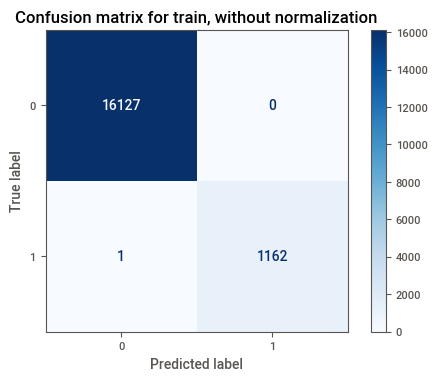

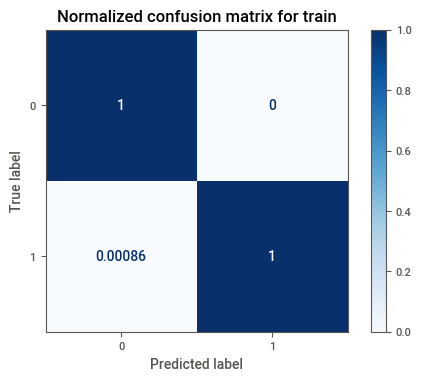

In [145]:
title_rf = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

confuse_mat(title_rf,clf_rf['classifier'].classes_,X_train,y_train,clf_rf)

Confusion Matrix - Test Data

In [98]:
y_pred_test = clf_rf.predict(X_test)

In [147]:
confusion_matrix(y_test,y_pred_test)

array([[3952,   42],
       [ 130,  199]], dtype=int64)

C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for test, without normalization
[[3952   42]
 [ 130  199]]
Normalized confusion matrix for test
[[0.98948423 0.01051577]
 [0.39513678 0.60486322]]


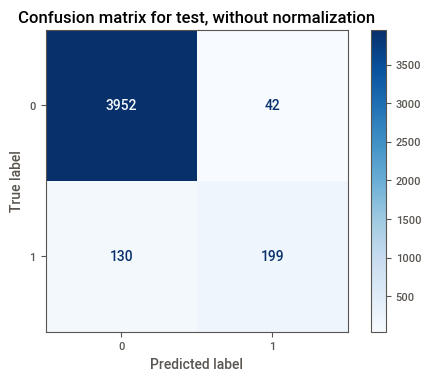

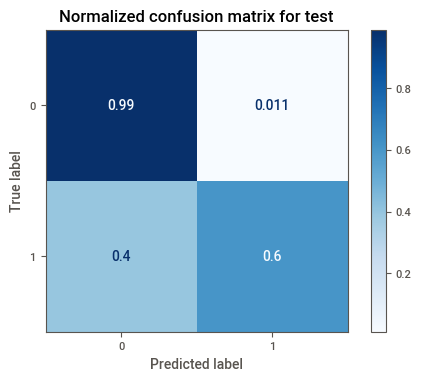

In [149]:
title_rf_test = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

confuse_mat(title_rf_test,clf_rf['classifier'].classes_,X_test,y_test,clf_rf)

Since it is an ensemble of decision trees which does not have coefficients associated with it and in turn the random forests do not have any coefficients associated with it. Also it is better than all the other classification models that have been mentioned above.

### Task 6 - a little error exploration (more challenging)

This will challenge your pandas and your general data manipulation skills. Just give it your best shot. If you don't get, you don't get it. It doesn't require much code - just the right code. :)

I also include another data file called `kc_house_data_regression.csv` in which the target variable is `price`. Everything else is exactly the same, including the order of the rows. So, here's your challenge. Using Model 2 (the lasso model with `C=1.0`), start by using the `predict` method to generate an array of predictions for the original test data. Obviously, some of the predictions are correct and some of them are not. It would be interesting to know more about the kinds of errors our model is making. We can see some things from the confusion matrix. However, since we don't have the actual `price` value, it's hard to visualize how the errors relate to it. For example, are we only making errors when the price is really close to 1 million? One way to visualize this is to create a histogram of the actual prices **only for those rows in test that we got wrong**. What makes this tricky? A few things:

* As I already mentioned, `price` is not in our original data but is in the `kc_house_data_regression.csv` dataset. Remember, other than the target variable, this dataset is identical (including the index) to the one we used above for classification.
* We partitioned the classification dataset into training and test datasets.
* In order to create the histogram, we simply need a Series (or array) of `price` values corresponding to the predictions in test that we got wrong.

**HINTS** 

* The pandas `join` method will come in handy.
* The pandas `.loc` selector can take a boolean array as an input for selecting rows or columns. Using one to select rows is quite useful for this problem.

Now since all the data is coming from all the three excel files is the same , we would just use the lasso model on the classification test data and then match the data with the regression file so that we get the match on the data that were actually misclassified for which we are going to use the join and after the join has been done and the values have been extracted, we would try to create a histogram out of it to see which of them have been misclassified

In [100]:
y_new = clf_2.predict(X)

In [101]:
y = pd.Series(y,name = 'y_original')

In [102]:
y_new = pd.Series(y_new,name='y_predicted')

In [103]:
test_df = pd.concat([y,y_new],axis = 1)

In [104]:
regression_df = pd.read_csv("./data/kc_house_data_regression.csv")

In [158]:
new_df = regression_df.join(test_df)

In [159]:
new_df_1 = new_df.loc[:,['price','y_original','y_predicted']]

In [160]:
new_df_wrongly_classified = new_df_1.loc[new_df['y_original'] != new_df['y_predicted']]

In [161]:
new_df_wrongly_classified

,price,y_original,y_predicted
69,1325000,1,0
103,1088000,1,0
115,740500,0,1
125,1450000,1,0
218,1072000,1,0
...,...,...,...
21548,1057000,1,0
21561,750000,0,1
21568,1700000,1,0
21597,1575000,1,0


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

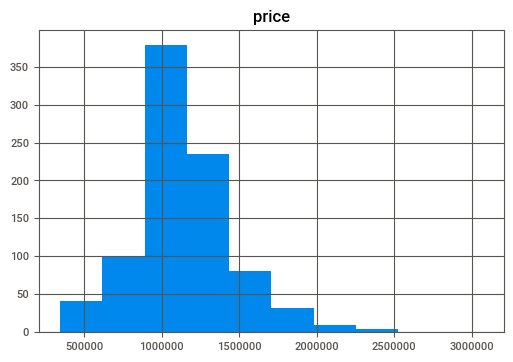

In [162]:
new_df_wrongly_classified.hist(column='price',bins=10)

Yes we can see most of the predictions get wrong as the prices near the 1 million mark so its actually a range of values ranging from around 800,000 to 1,400,000

## Optional Hacker Extra Credit tasks
I always like to include some extra credit tasks for those who want to push themselves a little further. For this problem, consider doing one or more of the following:

* Try out the [Histogram based Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html?highlight=histogram%20based%20gradient%20boosting%20classifier) shown in the optional materials at the end of Module 2. Compare its performance to logistic regression and the random forest.
* I also include another data file called `kc_house_data_regression.csv` in which the target variable is `price`. Use sklearn's `LassoCV` to find a good regression model for predicting `price`.

In [110]:
from sklearn.metrics import plot_confusion_matrix


# Import the gradient boosting module
from sklearn.ensemble import HistGradientBoostingClassifier

# Need the following to encode our target variable
from sklearn.preprocessing import OrdinalEncoder

In [111]:
pip install -U --user scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\narayanan\anaconda3\lib\site-packages (1.1.1)
Note: you may need to restart the kernel to use updated packages.


In [112]:
numeric_transformer_hgbc = StandardScaler()
categorical_transformer_hgbc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
target_transformer_hgbc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

preprocessor_hgbc = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer_hgbc, categorical_cols),
        ('num', numeric_transformer_hgbc, numeric_cols)],
        remainder='passthrough')

In [113]:
categorical_cols_idx = [_ for _ in range(len(categorical_cols))]

In [116]:
clf_hgbc = Pipeline(steps=[('preprocessor', preprocessor_hgbc),
                      ('classifier', HistGradientBoostingClassifier(categorical_features=categorical_cols_idx))])

In [153]:
clf_hgbc.fit(X_train,y_train)
clf_hgbc.fit(X_test,y_test)
print(f"hgbc training score: {clf_hgbc.score(X_train,y_train):.3f}")
print(f"hgbc test score: {clf_hgbc.score(X_test,y_test):.3f}")

hgbc training score: 0.961
hgbc test score: 1.000


C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for train, without normalization
[[15885   242]
 [  432   731]]
Normalized confusion matrix for train
[[0.98499411 0.01500589]
 [0.37145314 0.62854686]]


C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


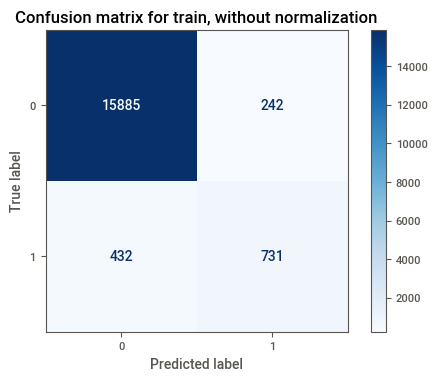

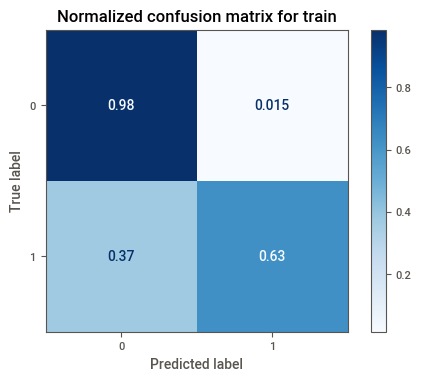

In [155]:
title_hgbc = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]

confuse_mat(title_hgbc,clf_hgbc['classifier'].classes_,X_train,y_train,clf_hgbc)

C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix for test, without normalization
[[3994    0]
 [   0  329]]
Normalized confusion matrix for test
[[1. 0.]
 [0. 1.]]


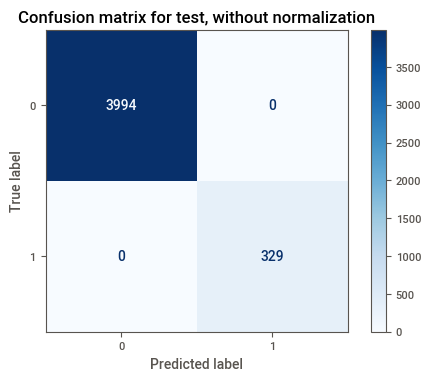

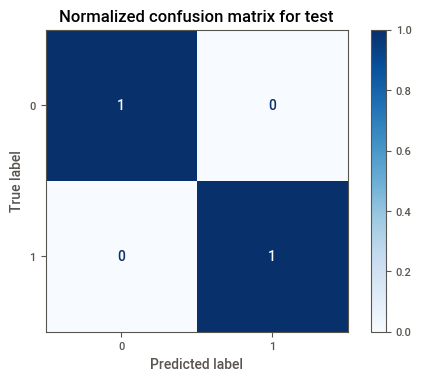

In [156]:
title_hgbc_test = [("Confusion matrix for test, without normalization", None),
                  ("Normalized confusion matrix for test", 'true')]

confuse_mat(title_hgbc_test,clf_hgbc['classifier'].classes_,X_test,y_test,clf_hgbc)

So for the training data the performance is not as good as the Random Forest claassifier but for the test data the accuracy is better than any other model that has been discussed above.

LASSO Cross Validation Model

So the cross validation model is used to run Lasso with different values of alpha. Just the model is run as such with the data that has been creatd above for the error metric exploration , since it includes the most relevant features along with the target column from the regression csv file i.e. the new_df


In [188]:
from sklearn.metrics import mean_squared_error

In [175]:
price = new_df.loc[:,'price']

In [181]:
df_lasso = X.join(price)

In [184]:
from sklearn.linear_model import Lasso, LassoCV
alphas = [0.1,0.3, 0.5, 0.8, 1]
lassocv = LassoCV(alphas=alphas, cv=5).fit(X,price)

C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95974430264557.88, tolerance: 225807564727.4099
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95973472375924.62, tolerance: 225807564727.4099
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95972201980527.75, tolerance: 225807564727.4099
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\narayanan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_de

In [186]:
print(lassocv)

LassoCV(alphas=[0.1, 0.3, 0.5, 0.8, 1], cv=5)


In [190]:
score = lassocv.score(X,price)
pricepred = lassocv.predict(X)
mse = mean_squared_error(price,pricepred)
print("Alpha:{0:.2f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(lassocv.alpha_, score, mse, np.sqrt(mse)))

Alpha:0.10, R2:0.631, MSE:49791321589.92, RMSE:223139.69


Hence we see that the alpha chosen is 0.10

## Deliverables
You should simply compress your entire project folder as either a zip file or a tar.gz file (do **NOT** ever use WinRAR to create rar files in this class). Note that when you do this, your "hidden" `.git` folder will get included. So, I'll be able to tell that you put the project under version control and I'll be able to look at your project folder structure. Before compressing the project folder to submit it:

* make sure all of your notebooks and other files are in the main project folder and have good filenames,
* make sure you've committed all of your changes (git),
* upload your compressed folder in Moodle.